# Sistemas Inteligentes

## Exercício Computacional 4 - Agrupamento (Clusterização)

### Identificação do Aluno

#### Nome Completo

Matheus Prudencio dos Santos

#### RA

11114014

## Instruções

1. Escolha um dataset, identifique-o e mostre suas características, então indique quais são os seus objetivos com esse dataset (no campo correspondente).

2. Com o dataset já importado para o notebook, faça os pré-processamentos que julgar necessários e, se for conveniente, efetue uma redução de dimensionalidade utilizando um método compatível com seus dados.

3. Utilize ao menos um método de Cross-Validation de sua preferência.

4. Escolha dois métodos de agrupamento (clusterização) para realizar abordagens distintas, então aplique-os ao dataset para chegar ao objetivo indicado por você no próprio notebook.

5. Utilize células intermediárias de tipo _Markdown_ para explicar o que é feito em cada célula de código. Mas não deixe de utilizar comentários breves e pertinentes dentro do próprio código. Isto significa que o desenvolvimento NÃO deve ser feito em uma única célula.

6. Sempre que for cabível, exiba as figuras, os gráficos, os valores (ao menos parte deles) etc., mas procure sempre manter um capricho em todas as saídas.

7. Ao final, comente da forma mais completa possível os resultados obtidos, sempre sugerindo o que poderia ser feito para melhorá-los e fornecendo elementos que contribuam para a sua compreensão.

8. Respeitem as regras gramaticais e procurem manter coesão, coerência e fluidez em seus textos.

9. Apesar de a análise dos resultados ser mais importante do que o código em si, serão analisados critérios como organização e clareza do código, então evitem códigos "poluídos" e confusos.

### Dataset

#### Nome do Dataset

Breast Cancer Wisconsin (Diagnostic) Data Set

#### Características do Dataset

É um dataset para o diaginostico de cancers malignos e benignos, onde suas features descrevem as seguintes informações:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

#### Fonte do Dataset

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

### Objetivos

Comparar uma classificação no random forest com 2 métodos de clusterização

## Desenvolvimento

In [1]:
from sklearn.decomposition import PCA
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import seaborn as sbn
%matplotlib inline


In [2]:
base = pd.read_csv('wdbc.data', names = range(32))
base.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Dados Faltantes

Vou usar seaborn para criar um heatmap para procurar dados faltantes

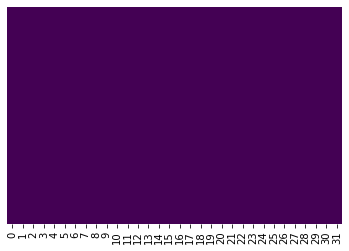

In [3]:
sbn.heatmap(base.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Como não tem temos dados faltantes irei analisar os dados mais a fundo

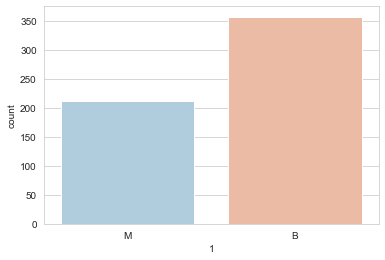

In [4]:
sbn.set_style('whitegrid')
sbn.countplot(x=1,data=base,palette='RdBu_r')

As classes são balanceadas e não precisam de ajustes

## Dividindo em x e Y

In [5]:
y = base[1]
base.drop([1], axis=1, inplace=True)
base.drop([0], axis=1, inplace=True)

n =[]
for x in range(30):
    n.append(x)
    
base.columns =n
base.head(2)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [6]:
y[:3]

0    M
1    M
2    M
Name: 1, dtype: object

## PCA

Para aplicar a redução de dimensionalidade via PCA irei normalizar os dados, mas primeiro irei encontrar os dados que devem ser normalizados, pois suspeito que certos dados já estão normalizados.

In [7]:
base.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
dvp = []
for x in range(30):
    if (base[x].std() >2):
        dvp.append(x)

print(dvp)

[0, 1, 2, 3, 12, 13, 20, 21, 22, 23]


Com essa informação vou normalizar as colunas 0, 1, 2, 3, 12, 13, 20, 21, 22, 23

In [9]:
df = pd.DataFrame(base[dvp])

scaler = StandardScaler()
df = scaler.fit_transform(df)

columns = [0, 1, 2, 3, 12, 13, 20, 21, 22, 23]
df = pd.DataFrame(df, columns = columns )

In [10]:
df.describe()

,0,1,2,3,12,13,20,21,22,23
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.256562e-16,1.049736e-16,-1.272171e-16,-1.900452e-16,-2.968237e-16,-1.088760e-16,-7.988142e-16,-1.834112e-17,-4.015534e-16,-2.848727e-17
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-1.044049e+00,-7.378291e-01,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-6.237679e-01,-4.947542e-01,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-2.866520e-01,-3.477828e-01,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,2.430307e-01,1.067726e-01,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,9.461986e+00,1.104184e+01,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00


Agora irei concatenar os dois dataframes

In [11]:
base.drop(columns, axis=1, inplace=True)

base = pd.concat([base, df], axis =1)
base.head()

,4,5,6,7,8,9,10,11,14,15,...,0,1,2,3,12,13,20,21,22,23
0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,...,1.097064,-2.073335,1.269934,0.984375,2.833031,2.487578,1.886690,-1.359293,2.303601,2.001237
1,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,...,1.829821,-0.353632,1.685955,1.908708,0.263327,0.742402,1.805927,-0.369203,1.535126,1.890489
2,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,...,1.579888,0.456187,1.566503,1.558884,0.850928,1.181336,1.511870,-0.023974,1.347475,1.456285
3,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,...,-0.768909,0.253732,-0.592687,-0.764464,0.286593,-0.288378,-0.281464,0.133984,-0.249939,-0.550021
4,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,...,1.750297,-1.151816,1.776573,1.826229,1.273189,1.190357,1.298575,-1.466770,1.338539,1.220724


Usando o PCA

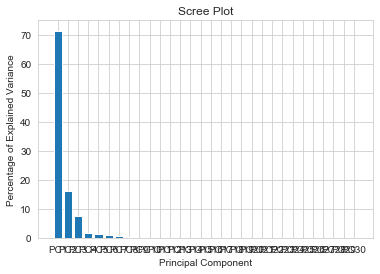

In [14]:
pca = PCA() # create a PCA object
pca.fit(base) # do the math
pca_data = pca.transform(base) # get PCA coordinates for scaled_data
 
#########################
#
# Draw a scree plot and a PCA plot
#
#########################
 
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

Sendo assim irei usar 2 variaveis, pois elas provocam as maiores variacias( 3 talvez seria melhor, mas não poderia plotar os clusters )

In [24]:
pca = PCA(n_components=2) # create a PCA object
pca.fit(base) # do the math
pca_data = pca.transform(base) #

## Classificação com  Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

classificador = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state=0)

resultados = cross_val_score(classificador, pca_data, y, cv = 10)
resultados.mean()
resultados.std()


0.03440831689347257

In [26]:
resultados.mean()

0.9229474548440066

## Clusterizando

## K Means

In [27]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(pca_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
print(kmeans.cluster_centers_)
print(kmeans.inertia_)

[[ 4.10653435 -0.05213854]
 [-1.2773782   0.01621821]]
2241.8994340798354


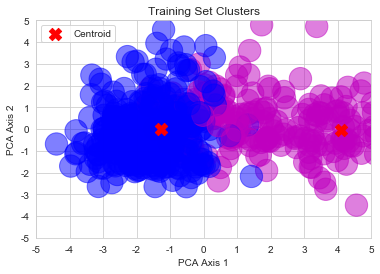

In [35]:
plt.figure()
plt.scatter(x=pca_data[:, 0], y=pca_data[:, 1], c=y, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.yticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('Training Set Clusters')
plt.grid(True)

plt.scatter(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

## Algoritmo de Propagação de Afinidade¶

In [32]:
ap = AffinityPropagation()
ap.fit(pca_data)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.5, max_iter=200, preference=None, verbose=False)

In [36]:
print(ap.cluster_centers_)
print(ap.cluster_centers_indices_)

[[ 3.64884266 -2.76783549]
 [ 0.37068633  1.98108939]
 [-1.50589443  1.43598783]
 [-1.74047895  0.41433344]
 [ 1.06573843 -0.23016949]
 [-2.51383513 -0.74044973]
 [ 0.31009752  0.61154478]
 [ 4.7572389  -0.31488354]
 [13.53536703 -4.48923592]
 [ 1.87404512  0.95787793]
 [ 8.27384821  0.42902001]
 [ 5.51566922  1.5721591 ]
 [ 3.53683882  0.72032819]
 [ 1.73406774  4.794345  ]
 [-2.98445904 -1.79523493]
 [-3.61673771 -0.66569899]
 [ 3.58929904 -1.13641238]
 [-0.04724171 -1.39097643]
 [-1.38326058 -0.34521743]
 [ 2.23068769 -0.33240885]
 [-0.44001304  0.51112096]
 [16.03240091 -2.11593175]
 [-2.54609841  0.41510799]
 [-1.46439792 -1.49768325]
 [ 7.95929603 -1.28159924]
 [-0.53427843  2.96181594]
 [-1.98703289  3.1247972 ]
 [-3.06264681  2.06508611]]
[  4 100 102 107 131 144 184 210 212 213 236 256 258 259 296 307 321 375
 383 408 438 461 470 482 521 543 557 568]


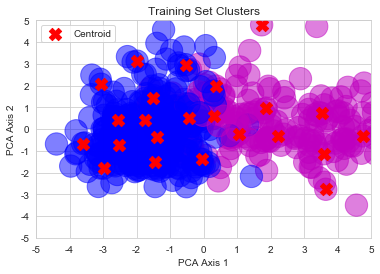

In [37]:
plt.figure()
plt.scatter(x=pca_data[:, 0], y=pca_data[:, 1], c=y, cmap='viridis', s=500, alpha=0.5)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.yticks(range(-5,6), ['-5','-4','-3','-2','-1','0','1','2','3','4','5'])
plt.xlabel('PCA Axis 1')
plt.ylabel('PCA Axis 2')
plt.title('Training Set Clusters')
plt.grid(True)

plt.scatter(x=ap.cluster_centers_[:,0], y=ap.cluster_centers_[:,1], c='r', s=150, marker='X', label='Centroid')
plt.legend()

## Discussão sobre os resultados

Os resultados encontrados tanto no Random forest quanto nos clusters foi muito bom, e isso é representado pela maneira como os dados são divididos no espaço. Os dados são Linearmente separaveis, assim ambos os métodos são bons.

Apesar disso poderiamos melhorar os dados aumentando o número de dimensões no PCA, pois apartir do grafico vemos que 3 dimensões trariam um resultado melhor, mas seriam mais difícies de comparar e entender que os dados são linearmente separaveis. 